In [0]:
from fastai.vision import *

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folderBrains = 'Brains'
fileBrains = 'urls_brains.csv'

folderBreasts = 'Breasts'
fileBreasts = 'urls_breasts.csv'

folderIntestines = 'Intestines'
fileIntestines = 'urls_intestines.csv'

folderLungs = 'Lungs'
fileLungs = 'urls_lungs.csv'

path = Path('Dataset\CT')

destBrains = path/folderBrains
destBrains.mkdir(parents=True, exist_ok=True)

destBreasts = path/folderBreasts
destBreasts.mkdir(parents=True, exist_ok=True)

destIntestines = path/folderIntestines
destIntestines.mkdir(parents=True, exist_ok=True)

destLungs = path/folderLungs
destLungs.mkdir(parents=True, exist_ok=True)


In [0]:
classes = ['Brains','Breasts','Intestines','Lungs']

In [47]:
download_images(path/fileBrains, destBrains, max_pics=200)
download_images(path/fileBreasts, destBreasts, max_pics=200)
download_images(path/fileIntestines, destIntestines, max_pics=200)
download_images(path/fileLungs, destLungs, max_pics=200)

In [50]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Brains


Breasts


Intestines


Lungs


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [52]:
data.classes

['Brains', 'Breasts', 'Intestines', 'Lungs']

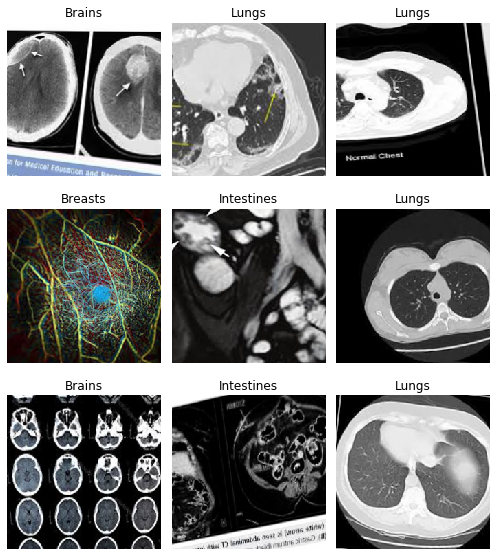

In [53]:
data.show_batch(rows=3, figsize=(7,8))

In [54]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Brains', 'Breasts', 'Intestines', 'Lungs'], 4, 576, 144)

In [55]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [58]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.497701,1.074448,0.305556,00:06
1,0.498370,0.977547,0.291667,00:06
2,0.485021,0.988094,0.277778,00:06
3,0.436690,0.963015,0.263889,00:06
4,0.404266,0.950004,0.256944,00:06
5,0.373516,0.928663,0.256944,00:06
6,0.346094,0.931524,0.250000,00:06
7,0.320072,0.918194,0.250000,00:06


In [0]:
learn.save('stage-1')